## Exploratory Data Analysis

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load the cleaned data
df = pd.read_csv("../data/processed/cleaned_telco_customer_churn.csv")

print(df.shape)
df.head()

(7021, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## High Level KPIs Questions
### 1. What is the overall churn rate of customers?

This metric is crucial for understanding customer retention and business health. A high churn rate may indicate dissatisfaction among customers or competitive pressures in the market.


In [3]:
churn_rate = round(df['Churn'].value_counts(normalize=True)*100, 2)
churn_rate

Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64

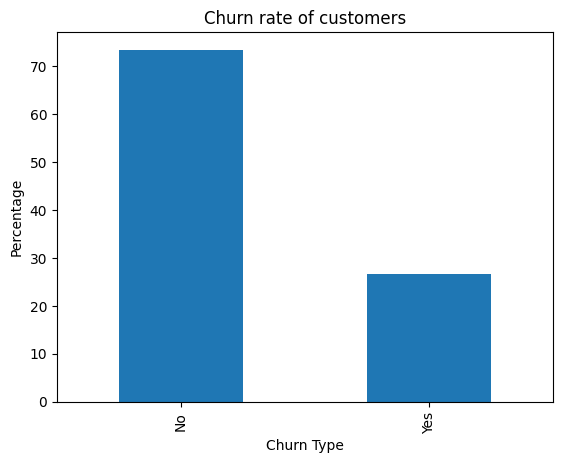

In [4]:
plt.figure()
churn_rate.plot(kind='bar')
plt.xlabel("Churn Type")
plt.ylabel("Percentage")
plt.title("Churn rate of customers")
plt.show()

#### Comment:
Churn rate of customers is approximately 26.5%, indicating that about one in four customers discontinue their service with the company. The churn rate is high. This suggests that the company may need to investigate the reasons behind customer attrition and implement strategies to improve customer retention. 

### 2. How does churn vary by customer tenure (new vs long-term customers)?
We will segment customers based on their tenure into three groups:
* new customers (0-6 months) - high risky as they are still evaluating the service
* mid-term customers (6-24 months) - moderate risk as they have some experience with the service
* long-term customers (24+ months) - low risk as they have established loyalty to the service. 

This type of customer segmentation helps us to identify which customer segments are most at risk of churning and allows for targeted retention strategies.

In [5]:
## Segment customers into three groups
df['tenure'] = df['tenure'].apply(lambda x: 'new' if x<=6 else ('midterm' if x<=24 else 'longterm'))
df['tenure'].sample(10)

1711    longterm
1440    longterm
5442    longterm
641     longterm
241          new
6155         new
2178    longterm
300          new
6511    longterm
6221         new
Name: tenure, dtype: object

In [6]:
## See churn rate baseed on tenure
tenure_wise_churn_rate = df.groupby(by='tenure')['Churn'].value_counts(normalize=True).round(2).to_frame()
tenure_wise_churn_rate

proportion
tenure   Churn            
longterm No           0.86
         Yes          0.14
midterm  No           0.68
         Yes          0.32
new      Yes          0.53
         No           0.47

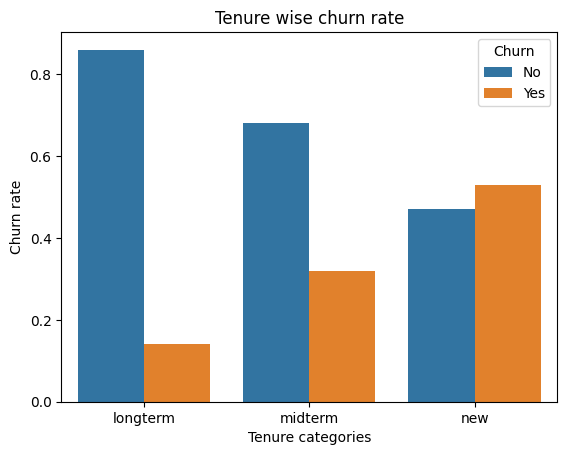

In [7]:
## Visualize it
plt.figure()
sns.barplot(data=tenure_wise_churn_rate, x='tenure', y='proportion', hue='Churn')
plt.title('Tenure wise churn rate')
plt.xlabel('Tenure categories')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
* This analysis revals that new customers (0-6 months) have the highest churn rate at approximately 53%, indicating that they are more likely to discontinue the service shortly after joining. 

* Mid-term customers (6-24 months) have a moderate churn rate of around 32%, while long-term customers (24+ months) exhibit the lowest churn rate at about 14%. 

* This trend suggests that customer loyalty increases with tenure, and efforts to retain new customers could significantly impact overall churn rates.

### 3. What percentage of total revenue is at risk due to churn?
This metric helps quantify the financial impact of customer churn on the business.

In [8]:
## Percentage of total revinue based on churn status
(df.groupby(by='Churn')['TotalCharges'].sum()/df['TotalCharges'].sum()).round(2)*100

Churn
No     82.0
Yes    18.0
Name: TotalCharges, dtype: float64

#### Comment:
So, 18% of total revenue is at risk due to churn. This indicates that a significant portion of the company's revenue could be lost if current churn rates persist.

### 4. How does churn trend differ across monthly vs yearly contracts?
Understanding how contract type influences churn can inform pricing and contract strategies to enhance customer retention.

In [9]:
contract_wise_churn_rate = df.groupby(by='Contract')['Churn'].value_counts(normalize=True).round(2).to_frame()
contract_wise_churn_rate

proportion
Contract       Churn            
Month-to-month No           0.57
               Yes          0.43
One year       No           0.89
               Yes          0.11
Two year       No           0.97
               Yes          0.03

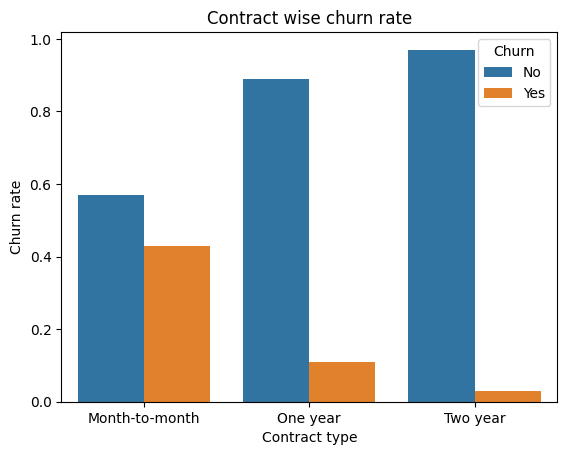

In [10]:
## Visualization
plt.figure()
sns.barplot(data=contract_wise_churn_rate, x='Contract', y='proportion', hue='Churn')
plt.title('Contract wise churn rate')
plt.xlabel('Contract type')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
Customers with month-to-month contracts have a significantly higher churn rate of approximately 43%, compared to those with one-year or two-year contracts. This suggests that longer-term contracts may contribute to greater customer retention.

### 5. Which customer segments contribute most to churn volume?


In [11]:
cusomer_segment_with_churn = pd.pivot_table(data=df, index=['Churn', 'tenure'], columns=['Contract'], aggfunc='size').loc['Yes', :].fillna(0)
cusomer_segment_with_churn

Contract,Month-to-month,One year,Two year
tenure,,,
longterm,352.0,137.0,48.0
midterm,521.0,25.0,0.0
new,779.0,4.0,0.0


In [12]:
cusomer_segment_with_churn_pct = ((cusomer_segment_with_churn/cusomer_segment_with_churn.sum().sum())*100).round(2)
cusomer_segment_with_churn_pct

Contract,Month-to-month,One year,Two year
tenure,,,
longterm,18.86,7.34,2.57
midterm,27.92,1.34,0.00
new,41.75,0.21,0.00


In [13]:
filtered_cusomer_segment_with_churn_pct = cusomer_segment_with_churn_pct.stack()[cusomer_segment_with_churn_pct.stack()>0]
filtered_cusomer_segment_with_churn_pct

tenure    Contract      
longterm  Month-to-month    18.86
          One year           7.34
          Two year           2.57
midterm   Month-to-month    27.92
          One year           1.34
new       Month-to-month    41.75
          One year           0.21
dtype: float64

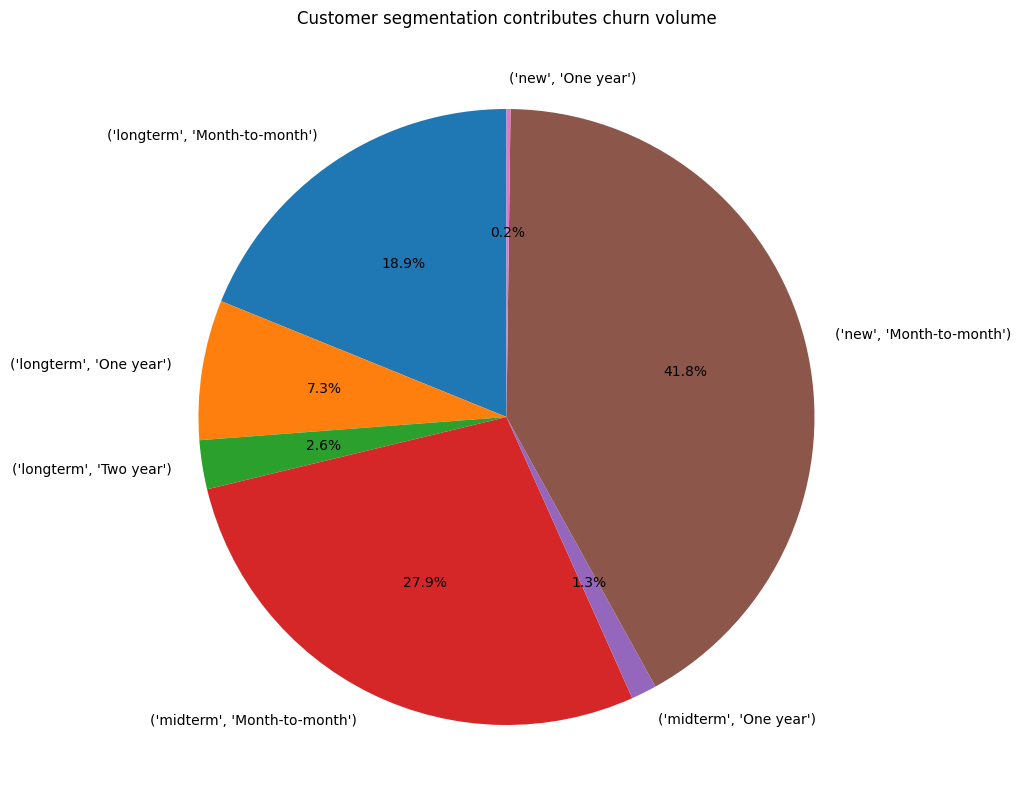

In [14]:
## Pie chart
plt.figure(figsize=(10,10))
x = filtered_cusomer_segment_with_churn_pct.values
labels = filtered_cusomer_segment_with_churn_pct.index
plt.pie(x=x, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Customer segmentation contributes churn volume")
plt.show()

#### Comment:
So, new customers (0-6 months) with month-to-month contracts contribute the most to churn volume, accounting for approximately 41.8% of all churned customers. This indicates that this segment is particularly vulnerable to churn and we should focus more on this group.

## Demographic & Customer Profile Analysis

### 1. Does churn vary by gender?
Analyzing churn rates between male and female customers to identify any significant differences.

In [15]:
gender_wise_churn_rate = df.groupby(by='gender')['Churn'].value_counts(normalize=True).round(2).to_frame()
gender_wise_churn_rate

proportion
gender Churn            
Female No           0.73
       Yes          0.27
Male   No           0.74
       Yes          0.26

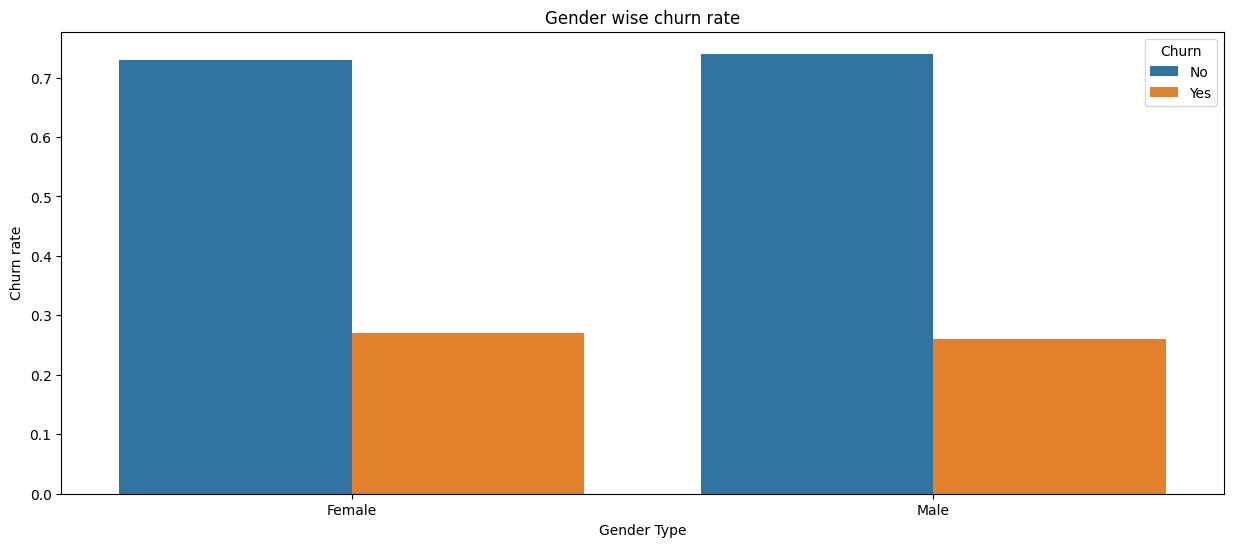

In [16]:
## Visualize
plt.figure(figsize=(15,6))
sns.barplot(data=gender_wise_churn_rate, x='gender', y='proportion', hue='Churn')
plt.title('Gender wise churn rate')
plt.xlabel('Gender Type')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
Churn rate varies with gender but not so much. The churn rate for female (27%) is slighly higher than male(26%) customers. 

### 2. Are senior citizens more likely to churn?
Analyzing churn rates among senior citizens compared to other age groups to determine if age is a significant factor in customer retention.

In [17]:
age_wise_churn_rate = df.groupby(by='SeniorCitizen')['Churn'].value_counts(normalize=True).round(2).to_frame()
age_wise_churn_rate

proportion
SeniorCitizen Churn            
0             No           0.76
              Yes          0.24
1             No           0.58
              Yes          0.42

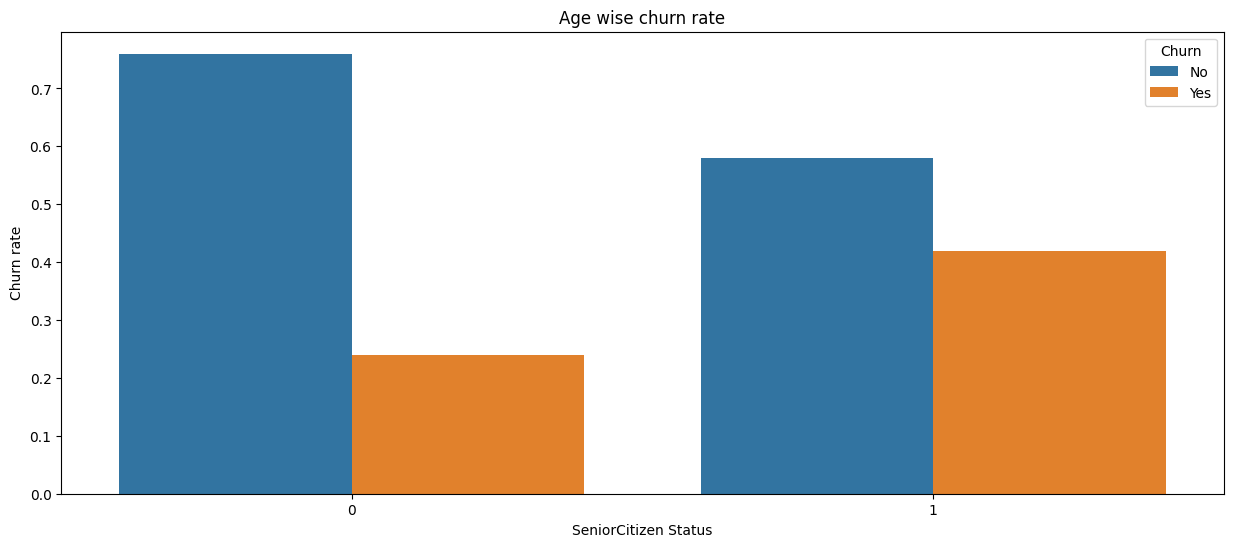

In [18]:
## Visualize
plt.figure(figsize=(15,6))
sns.barplot(data=age_wise_churn_rate, x='SeniorCitizen', y='proportion', hue='Churn')
plt.title('Age wise churn rate')
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
This analysis indicates that senior citizens have a higher churn rate of approximately 42%, compared to 24% for non-senior customers. This suggests that age may play a role in customer retention, and targeted strategies may be needed to address the specific needs and concerns of senior customers.

### 3. How does churn differ for customers with partners or dependents?
Customers with partners or dependents may have different needs and priorities, which can influence their likelihood of churning. Understanding these differences can help tailor retention strategies to specific customer segments.


In [19]:
## Churn rate of customers based on partner
partner_wise_churn_rate = df.groupby(by='Partner')['Churn'].value_counts(normalize=True).round(2).to_frame()
partner_wise_churn_rate

proportion
Partner Churn            
No      No           0.67
        Yes          0.33
Yes     No           0.80
        Yes          0.20

In [20]:
## Churn rate of customers based on denpendencies
dependent_wise_churn_rate = df.groupby(by='Dependents')['Churn'].value_counts(normalize=True).round(2).to_frame()
dependent_wise_churn_rate

proportion
Dependents Churn            
No         No           0.69
           Yes          0.31
Yes        No           0.84
           Yes          0.16

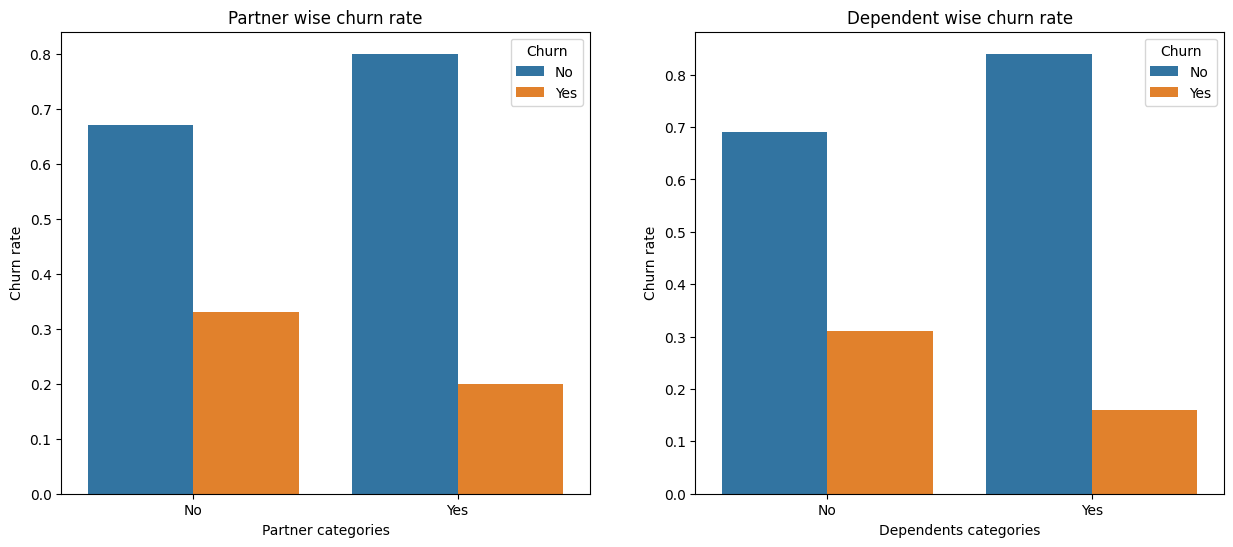

In [21]:
## Visualization
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=partner_wise_churn_rate, x='Partner', y='proportion', hue='Churn')
plt.title('Partner wise churn rate')
plt.xlabel('Partner categories')
plt.ylabel('Churn rate')

plt.subplot(1,2,2)
sns.barplot(data=dependent_wise_churn_rate, x='Dependents', y='proportion', hue='Churn')
plt.title('Dependent wise churn rate')
plt.xlabel('Dependents categories')
plt.ylabel('Churn rate')

plt.show()

#### Comment:
* This analysis shows that customer without partners  and dependents have a higher churn rate.
* Churn rate for customers without partners is approximately 33%
* Churn rate for customers without dependencis is approximately 31%

### 4. Which demographic group has the highest churn probability?
Understanding churn rates across different demographic groups (gender, SeniorCitizen, Partner, Dependents).

In [22]:
demographic_groups_wise_churn=pd.pivot_table(data=df, index=['Churn', 'gender', 'SeniorCitizen'], columns=['Partner', 'Dependents'], aggfunc='size')
demographic_groups_wise_churn

Partner                      No       Yes     
Dependents                   No  Yes   No  Yes
Churn gender SeniorCitizen                    
No    Female 0              909  110  482  710
             1              159    2  136   31
      Male   0              962  166  438  713
             1              126    4  176   31
Yes   Female 0              428   32  113  124
             1              158    1   73    8
      Male   0              418   43  128  105
             1              117    1  105   12

#### Comment:
* There are 32 possibe demographic groups based on the combinations.
* Among these groups, the one with the highest churn numbers is (**Gender: Female, SeniorCitizen: No, Partner: No, Dependents: No**) with a churn count of 428.
* So, this demographic group has the highest churn probability compared to other groups.

### 5. Is there a demographic segment that is low churn but high revenue?


In [23]:
demographic_segment_with_revenue = df.groupby(by=['Churn','gender', 'SeniorCitizen', 'Dependents', 'Partner']).agg({'Churn':'size', 'TotalCharges':'sum'}).loc['Yes', :]
demographic_segment_with_revenue['PerChurnRevenue'] = demographic_segment_with_revenue['TotalCharges']/demographic_segment_with_revenue['Churn']
demographic_segment_with_revenue.sort_values(by=['PerChurnRevenue'], ascending=False)

Churn  TotalCharges  PerChurnRevenue
gender SeniorCitizen Dependents Partner                                      
Male   1             Yes        Yes         12      47452.70      3954.391667
       0             No         Yes        128     330260.90      2580.163281
Female 1             No         Yes         73     184059.00      2521.356164
Male   1             No         Yes        105     263073.95      2505.466190
Female 1             Yes        Yes          8      19544.15      2443.018750
       0             No         Yes        113     245110.85      2169.122566
Male   0             Yes        Yes        105     226882.90      2160.789524
Female 0             Yes        Yes        124     236720.05      1909.032661
       1             No         No         158     211737.40      1340.110127
Male   1             No         No         117     156377.15      1336.556838
       0             No         No         418     446439.30      1068.036603
Female 0             No         No         428     420269.30       981.937617
                     Yes        No          32      31095.55       971.735937
Male   0             Yes        No          43      39270.45       913.266279
Female 1             Yes        No           1         71.00        71.000000
Male   1             Yes        No           1         50.15        50.150000

#### Comment:
Demographic segment with **gender: male, SeniorCitizen: yes, Dependents: yes, Partner: Yes** has **low churn** (churn_count=12) but **high revenue** (revenue_per_churn=3954.40). This segment could be targeted for upselling or cross-selling opportunities to further enhance revenue while maintaining low churn rates.

## Service Usage & Product Impact Analysis
### 1. How does churn vary by internet service type (DSL, Fiber, No Internet)?
Analyzing churn rates across different internet service types to identify any significant differences.

In [24]:
## Churn rate of customers based on internet service
internet_service_wise_churn_rate = df.groupby(by='InternetService')['Churn'].value_counts(normalize=True).round(2).to_frame()
internet_service_wise_churn_rate

proportion
InternetService Churn            
DSL             No           0.81
                Yes          0.19
Fiber optic     No           0.58
                Yes          0.42
No              No           0.93
                Yes          0.07

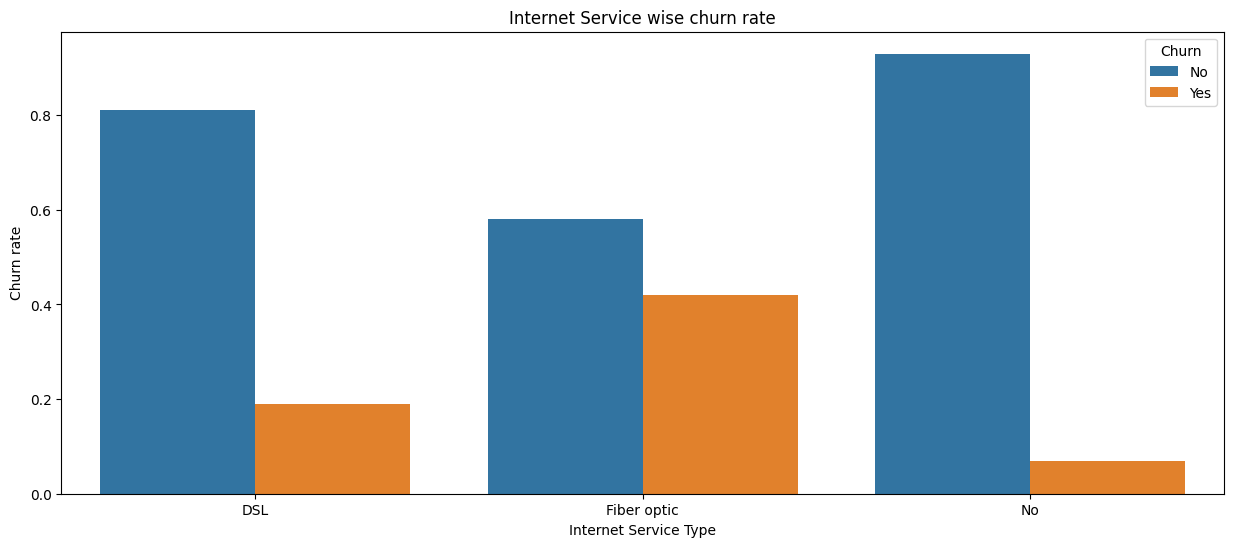

In [25]:
## Visualize
plt.figure(figsize=(15,6))
sns.barplot(data=internet_service_wise_churn_rate, x='InternetService', y='proportion', hue='Churn')
plt.title('Internet Service wise churn rate')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn rate')
plt.show()

#### Comment:
Internet service with **Fiber optic** has the highest churn rate of approximately **42%**, followed by DSL at around 19%. Customers without internet service have the lowest churn rate of about 7%. This suggests that the type of internet service may influence customer retention, with Fiber optic users being more prone to churn.

### 2. Do customers with fiber optic internet churn more?
Yes, and it's percentage is 42% as analyzed above.

### 3. How do additional services (OnlineSecurity, TechSupport, Streaming, ...) impact churn?


In [26]:
additional_services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace Yes with 1 and other with 0
for service in additional_services:
    df[service]=df[service].apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,new,0,0,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,longterm,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,new,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,longterm,0,0,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,new,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
## Impact on churn rate by each additional services
data = []
for service in additional_services:
    service_wise_churn_rate_for_yes = df.groupby(by=service)['Churn'].value_counts(normalize=True).round(2).unstack()['Yes']
    data.append({'Service':service, 'Has Service':service_wise_churn_rate_for_yes.index.values[0], 'Churn Rate':service_wise_churn_rate_for_yes.values[0]})
    data.append({'Service':service, 'Has Service':service_wise_churn_rate_for_yes.index.values[1], 'Churn Rate':service_wise_churn_rate_for_yes.values[1]})

service_table = pd.DataFrame(data)
service_table

,Service,Has Service,Churn Rate
0,PhoneService,0,0.25
1,PhoneService,1,0.27
2,MultipleLines,0,0.25
3,MultipleLines,1,0.29
4,OnlineSecurity,0,0.31
5,OnlineSecurity,1,0.15
6,OnlineBackup,0,0.29
7,OnlineBackup,1,0.22
8,DeviceProtection,0,0.29
9,DeviceProtection,1,0.23


In [28]:
## How much each individual service impacts (reduces/increases) the churn rate after activating it
churn_rate_diff = []
for i in range(0,16,2):
    diff = (service_table.iloc[i+1, :]['Churn Rate'] - service_table.iloc[i, :]['Churn Rate']).round(2)
    churn_rate_diff.append({'Service':service_table.iloc[i, :]['Service'],'ChurnRateIncrement':diff})
churn_rate_diff_df = pd.DataFrame(churn_rate_diff).sort_values(by=['ChurnRateIncrement'], ascending=False)
churn_rate_diff_df

,Service,ChurnRateIncrement
6,StreamingTV,0.06
7,StreamingMovies,0.06
1,MultipleLines,0.04
0,PhoneService,0.02
4,DeviceProtection,-0.06
3,OnlineBackup,-0.07
2,OnlineSecurity,-0.16
5,TechSupport,-0.16


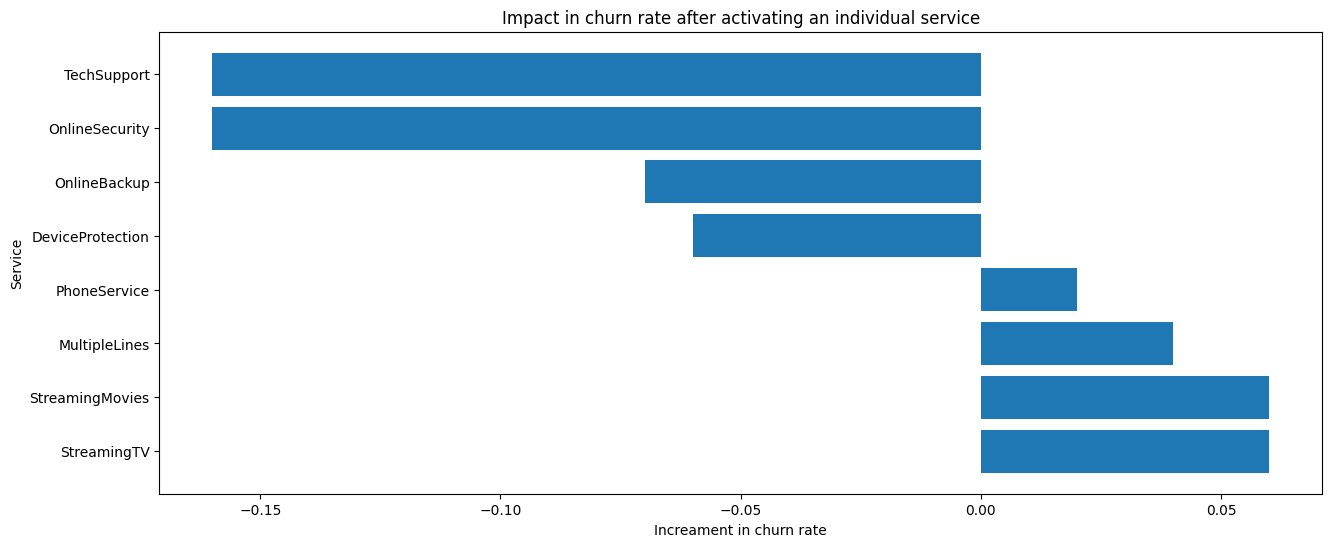

In [29]:
## Visualize the impact in churn rate after activating an individual service
plt.figure(figsize=(15,6))
plt.barh(y=churn_rate_diff_df['Service'], width=churn_rate_diff_df['ChurnRateIncrement'])
plt.title("Impact in churn rate after activating an individual service")
plt.xlabel('Increament in churn rate')
plt.ylabel('Service')
plt.show()

#### Comment:
So, there are some additional services that impact churn significantly:
* Services like **tech support, online security** and **online backup** etc **decrease** churn rate after activation.
* On the other hand, services like **streaming TV** and **streaming movies** **increase** churn rate after activation.

### 4. Which services act as churn reducers?
From above analysis, it is clear that services like **Tech Support**, **Online Security**, **Online Backup**, and **Device Protection** act as churn reducers.

### 5. Are customers with multiple services less likely to churn?
Anlysis the impact on churn rate by multiple services subscribed.

In [30]:
df['TotalServices'] = df[additional_services].sum(axis=1)
churn_rate = (df.groupby(['TotalServices'])['Churn']
              .apply(lambda x: ((x=='Yes').mean()*100).round(2))
              .reset_index(name='Churn_Rate')
              )
churn_rate

,TotalServices,Churn_Rate
0,0,43.75
1,1,21.17
2,2,32.83
3,3,36.48
4,4,31.38
5,5,25.61
6,6,22.50
7,7,12.44
8,8,5.31


<Figure size 1500x600 with 0 Axes>

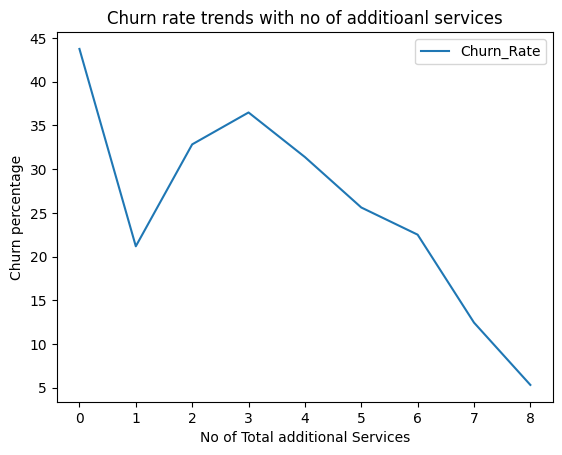

In [31]:
## Visualize the churn rate trends with no of multiple services
plt.figure(figsize=(15,6))
churn_rate.plot(kind='line', x='TotalServices', y='Churn_Rate')
plt.title("Churn rate trends with no of additioanl services")
plt.xlabel('No of Total additional Services')
plt.ylabel('Churn percentage');

#### Comment:
From the abobe graph it is clear that customers churn rate gradually decreases as we add multiple services. But you should take decision carefully as adding more services may also increase the cost for customers which may lead to churn.

### 6. Best Bundled services
The bundle of services with the lowest churn rate.

In [36]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalServices
0,Female,0,Yes,No,new,0,0,DSL,0,1,...,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,longterm,1,0,DSL,1,0,...,0,0,0,One year,No,Mailed check,56.95,1889.50,No,3
2,Male,0,No,No,new,1,0,DSL,1,1,...,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
3,Male,0,No,No,longterm,0,0,DSL,1,0,...,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,0,No,No,new,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
